In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

np.random.seed(42)
from sklearn.metrics import confusion_matrix

import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

C:\Users\RAJ\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\RAJ\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\RAJ\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\RAJ\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
skin_df = pd.read_csv('R:\CV\Skin Disease\SkinDiseaseDetectionSystem-master\Dataset/HAM10000_metadata.csv')

SIZE=32

le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))
 
skin_df['label'] = le.transform(skin_df["dx"]) 
print(skin_df.sample(10))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        lesion_id      image_id   dx    dx_type   age     sex  \
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male   
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization  label  
1617             face      4  
8128  lower extremity      5  
2168             back      4  
1090            trunk      2  
7754          abdomen      5  
8071            trunk      5  
7423  upper extr

In [4]:
from sklearn.utils import resample
print(skin_df['label'].value_counts())


df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

n_samples=500 
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced, 
                              df_2_balanced, df_3_balanced, 
                              df_4_balanced, df_5_balanced, df_6_balanced])

print(skin_df_balanced['label'].value_counts())

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64
5    500
3    500
1    500
6    500
4    500
2    500
0    500
Name: label, dtype: int64


In [5]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                    for x in glob(os.path.join('R:\CV\Skin Disease\SkinDiseaseDetectionSystem-master\Dataset/', '*', '*.jpg'))}

skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)

skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))



X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255.
Y=skin_df_balanced['label']  
Y_cat = to_categorical(Y, num_classes=7)

x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)

In [6]:
num_classes = 7

model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          7

In [7]:
batch_size = 16 
epochs = 50

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

Epoch 1/50
165/165 - 112s - loss: 1.8658 - acc: 0.2362 - val_loss: 1.8090 - val_acc: 0.2446
Epoch 2/50
165/165 - 8s - loss: 1.7013 - acc: 0.2857 - val_loss: 1.6093 - val_acc: 0.3623
Epoch 3/50
165/165 - 8s - loss: 1.5478 - acc: 0.3638 - val_loss: 1.4831 - val_acc: 0.3897
Epoch 4/50
165/165 - 8s - loss: 1.4916 - acc: 0.4034 - val_loss: 1.4086 - val_acc: 0.4069
Epoch 5/50
165/165 - 8s - loss: 1.4032 - acc: 0.4278 - val_loss: 1.4425 - val_acc: 0.3954
Epoch 6/50
165/165 - 8s - loss: 1.4227 - acc: 0.4251 - val_loss: 1.4315 - val_acc: 0.4171
Epoch 7/50
165/165 - 8s - loss: 1.3576 - acc: 0.4568 - val_loss: 1.3802 - val_acc: 0.4594
Epoch 8/50
165/165 - 8s - loss: 1.3012 - acc: 0.4827 - val_loss: 1.2886 - val_acc: 0.4743
Epoch 9/50
165/165 - 8s - loss: 1.2839 - acc: 0.4960 - val_loss: 1.2655 - val_acc: 0.4903
Epoch 10/50
165/165 - 8s - loss: 1.2445 - acc: 0.5070 - val_loss: 1.3164 - val_acc: 0.4777
Epoch 11/50
165/165 - 8s - loss: 1.2355 - acc: 0.5124 - val_loss: 1.2761 - val_acc: 0.4640
Epoch 

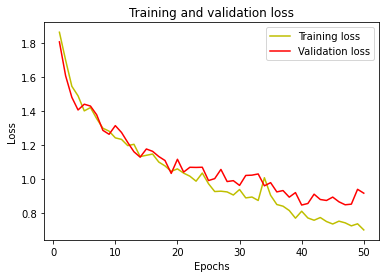

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

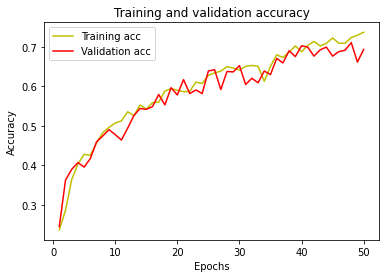

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 

In [10]:
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis = 1) 

y_true = np.argmax(y_test, axis = 1)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

<AxesSubplot:>

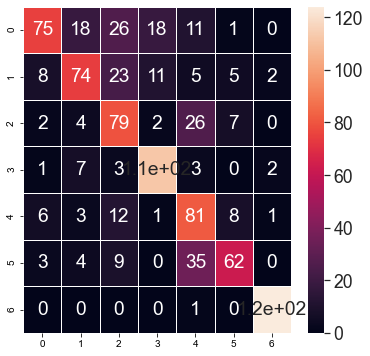

In [11]:
cm = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

Text(0, 0.5, 'Fraction of incorrect predictions')

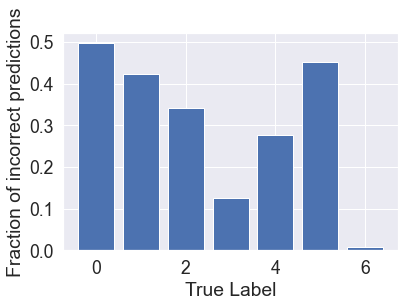

In [12]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [13]:
model.save('zep.model')

INFO:tensorflow:Assets written to: zep.model\assets


In [19]:
model.predict_classes(x_test)

array([3, 1, 4, 3, 2, 4, 3, 3, 2, 0, 3, 2, 6, 1, 2, 2, 0, 3, 6, 5, 4, 3,
       4, 1, 2, 2, 1, 2, 2, 6, 6, 3, 4, 1, 6, 6, 0, 0, 1, 4, 3, 6, 1, 2,
       3, 0, 3, 3, 1, 3, 3, 2, 4, 6, 4, 0, 4, 0, 2, 3, 6, 4, 1, 3, 3, 6,
       0, 3, 2, 5, 5, 2, 2, 4, 1, 2, 6, 5, 6, 3, 6, 6, 6, 6, 4, 5, 2, 4,
       0, 1, 2, 6, 1, 5, 6, 4, 3, 2, 3, 1, 3, 4, 2, 2, 2, 0, 6, 6, 1, 1,
       0, 1, 2, 0, 4, 6, 6, 3, 5, 3, 1, 5, 6, 2, 1, 1, 4, 3, 1, 3, 3, 0,
       2, 6, 5, 4, 6, 6, 1, 3, 2, 6, 0, 3, 5, 5, 2, 3, 2, 0, 4, 4, 4, 2,
       5, 2, 3, 3, 0, 3, 0, 4, 2, 5, 2, 0, 4, 4, 4, 1, 3, 2, 0, 2, 3, 6,
       1, 5, 1, 6, 6, 2, 2, 0, 2, 2, 2, 3, 3, 5, 5, 5, 6, 2, 4, 6, 4, 3,
       2, 0, 2, 0, 3, 2, 0, 5, 5, 6, 6, 4, 2, 4, 6, 6, 6, 6, 2, 5, 4, 0,
       0, 2, 1, 1, 4, 3, 6, 2, 2, 3, 4, 3, 1, 6, 3, 3, 4, 3, 0, 1, 1, 0,
       1, 4, 3, 3, 1, 1, 6, 3, 4, 6, 3, 1, 1, 3, 5, 2, 1, 3, 5, 0, 0, 2,
       6, 4, 1, 4, 0, 1, 6, 0, 0, 1, 1, 0, 0, 6, 5, 3, 2, 3, 0, 6, 1, 6,
       0, 4, 1, 6, 1, 1, 3, 2, 4, 4, 4, 4, 1, 3, 3,